In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
import time
import re
import json
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
url = "https://genshin-info.ru/wiki/personazhi/"
driver.get(url)

driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
name_list = []
index_character_list = []
poster_list = []
hero_list = []
url_list = []
group_list = []
name_value = "Геншин Импакт"
group_value = "Игры\Аниме"
src = "https://genshin-info.ru"
image_src = "https://genshin-info.ru/upload/resize_cache/iblock/60e/im9iqhbj3momcdaafcajp91ic12mrjpt/781_390_1d7a58ff99b324185ccb5ad5dfbdb5e85/Snimok-ekrana-_967_.png"

characters = driver.find_elements(By.CLASS_NAME, "itemList__item")

for index, character in enumerate(characters, start=1):
    index_character_list.append(index)
    name_list.append(name_value)
    poster_list.append(image_src)
    hero = character.find_element(By.CLASS_NAME, "itemcard__name").text
    hero_list.append(hero)
    url = character.find_element(By.CLASS_NAME, "itemcard__img img").get_attribute("data-src")
    url_list.append(src+url)
    group_list.append(group_value)
driver.quit()

In [ ]:
hero_list = ['Путешественник\путешественница' if hero == ' ' else hero for hero in hero_list]
print(len(name_list))
print(len(poster_list))
print(hero_list)
print(url_list)
print(len(group_list))

In [ ]:
import pandas as pd

df_existing = pd.read_csv('data.csv')

last_index = df_existing['index'].max()
last_index_world = df_existing['index_world'].max()

data = {
    'name': name_list,
    'poster': poster_list,
    'hero': hero_list,
    'url': url_list,
    'group': group_list,
}

df_new = pd.DataFrame(data)

df_new['index'] = range(last_index + 1, last_index + len(df_new) + 1)
df_new['index_world'] = last_index_world + 1
df_new['index_character'] = range(len(df_new))

df_combined = pd.concat([df_existing, df_new], ignore_index=True)

df_combined.to_csv('data.csv', index=False)

In [3]:
df = pd.read_csv('data.csv')
df.tail(79)

,Unnamed: 0,index,index_character,index_world,name,poster,hero,url,group,Unnamed: 8,url_info,description
1517,NaN,1617,0,24,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Фурина,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN
1518,NaN,1618,1,24,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Шарлотта,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN
1519,NaN,1619,2,24,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Ризли,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN
1520,NaN,1620,3,24,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Нёвиллет,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN
1521,NaN,1621,4,24,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Лини,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,NaN,1691,74,24,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Бэй Доу,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN
1592,NaN,1692,75,24,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Беннет,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN
1593,NaN,1693,76,24,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Барбара,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN
1594,NaN,1694,77,24,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Путешественник\путешественница,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN


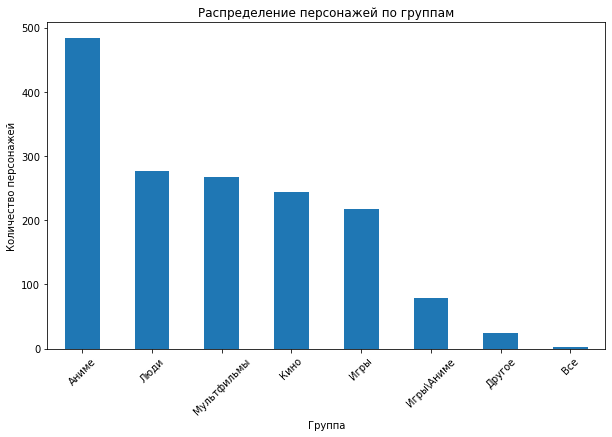

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
group_counts = df['group'].value_counts()
plt.figure(figsize=(10, 6))
group_counts.plot(kind='bar')
plt.title('Распределение персонажей по группам')
plt.xlabel('Группа')
plt.ylabel('Количество персонажей')
plt.xticks(rotation=45)
plt.show()

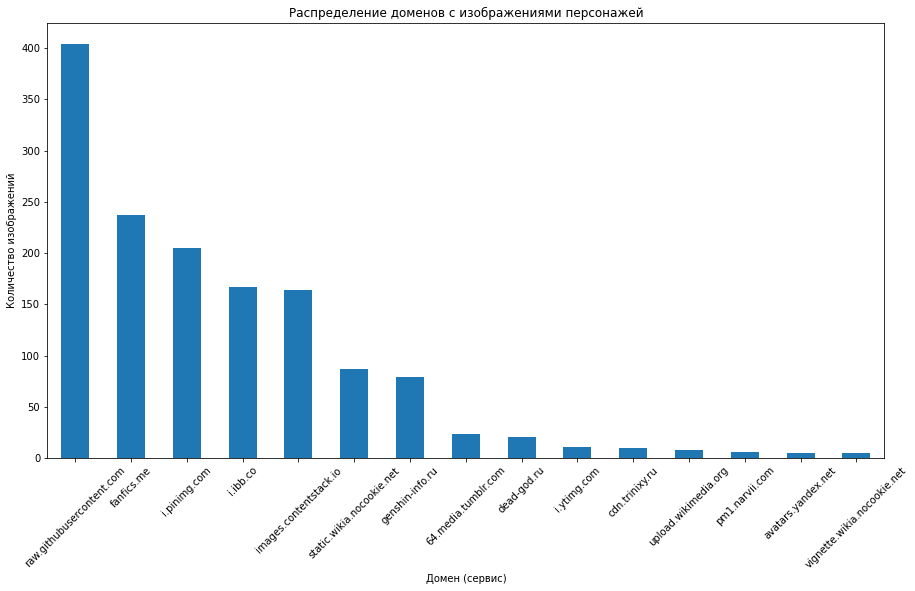

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from urllib.parse import urlparse
df['Domain'] = df['url'].apply(lambda x: urlparse(x).netloc)
domain_counts = df['Domain'].value_counts()
domain_counts = domain_counts[domain_counts >= 5]
plt.figure(figsize=(15, 8))
domain_counts.plot(kind='bar')
plt.title('Распределение доменов с изображениями персонажей')
plt.xlabel('Домен (сервис)')
plt.ylabel('Количество изображений')
plt.xticks(rotation=45)
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
df = df[3:]
group_counts = df['name'].value_counts()
def update_plot(selected_group):
    plt.figure(figsize=(10, 6))
    group_data = df[df['name'] == selected_group]
    group_data_counts = group_data['name'].value_counts()
    group_data_counts.plot(kind='bar', width=0.1)
    plt.title(f'Количество персонажей во вселенной {selected_group}')
    plt.xlabel('Мир')
    plt.ylabel('Количество персонажей')
    plt.xticks(rotation=45)
    plt.show()
group_list = df['name'].unique()
interact(update_plot, selected_group=widgets.Dropdown(options=group_list, description='Выберите мир:'))

interactive(children=(Dropdown(description='Выберите мир:', options=('Наруто', 'Игра Престолов', 'Гарри Поттер…

<function __main__.update_plot(selected_group)>